In [1]:
from Node.Node import Control_node
from Node.functions import *
import numpy as np
import time
import pylab as pl
from IPython import display


### Agent
Fields:
`Agent(inputs, behavioral_model, system_estimate, reference, reference_update, sensor_function, comparator_function, controller_update, internal_model_update)`
<br/>
<br/>
**inputs** - source of inputs (i.e. environment, state observations, others behaviors)
<br/>
**behavioral model** - initial matrix expressing future state given last behavior ("B" matrix)
<br/>
**system estimate** - initial matrix expressing future state given last state ("A" matrix)
<br/>
**reference** - target state 
<br/>
**reference update** - update to reference (target) signal
<br/>
**sensor function** - for taking in (and processing) observations
<br/>
**comparator function** - for comparing observation and estimate
<br/>
**controller** - for generating output
<br/>
**controller update** - for updating the behavioral matrix 
<br/>
**internal model** - for generating forward prediction
<br/>
**internal model update** - for updating the system estimate 
<br/>


![IMC](diagram.png)

### Linear Agents 

In [2]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([0.25])
B2 = np.array([0.25])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([1])
A2 = np.array([1])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.5])
R2 = np.array([0.5])

# Initial behavior
behav_1 = np.array([0.7])
behav_2 = np.array([0.3])


# get the state observation (behaviors of others)
def sense(inputs):
    return inputs

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a behavior
def control(error, behavioral_model, previous_output):
    #output = np.array([behavioral_model[i][i]*error[i] for i in range(len(error))])
    #output = dynamic_sigmoid(previous_output, error)
    output = -(behavioral_model @ error) + previous_output
    return output


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate @ previous_state) + (behavioral_model @ previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    error = curr_system_est - inputs
    #learning_rate = 0.01
    system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate
    

In [3]:


agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, system_estimate=A1, reference=R1, init_behavior=behav_1)
agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update,  controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, system_estimate=A2, reference=R2, init_behavior=behav_2)


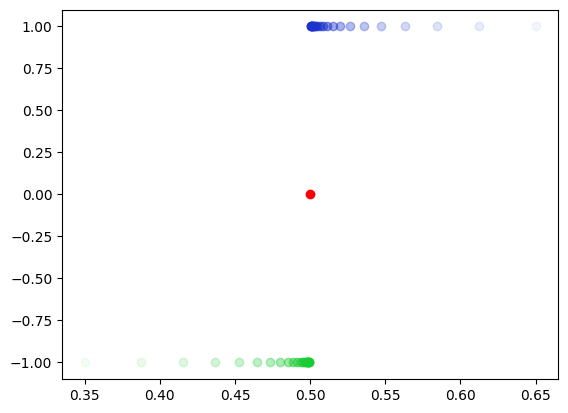

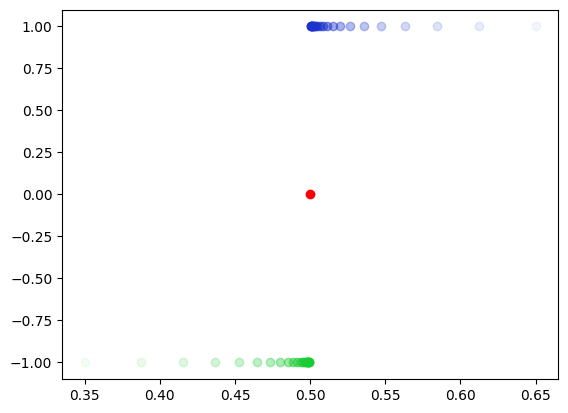

In [4]:
%matplotlib inline
trials = 20
#time = [n for n in range(trials)]
color = (0.1,0.2,0.8,0.1)
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

pl.scatter(R1[0],0, c='red')
for t in range(trials):
    b1_temp = agent1.go(b2)   
    b2_temp = agent2.go(b1)

    agent1_behaviors.append(agent1.get_output())
    agent2_behaviors.append(agent2.get_output())

    agent1_error.append(agent1.get_error())
    agent2_error.append(agent2.get_error())
    #agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    b1 = b1_temp
    b2 = b2_temp
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(b1[0],1,c=tuple(color1))
    pl.scatter(b2[0],-1,c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.5)

## Sigmoid Agents

In [5]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([0.2])
B2 = np.array([0.2])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([1])
A2 = np.array([1])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.5])
R2 = np.array([0.5])

# Initial behavior
behav_1 = np.array([0.2])
behav_2 = np.array([0.3])


# get the state observation (behaviors of others)
def sense(inputs):
    return inputs

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a behavior
def control(error, behavioral_model, previous_output):
    #output = np.array([behavioral_model[i][i]*error[i] for i in range(len(error))])
    output = dynamic_sigmoid(previous_output, error)
    #output = -(behavioral_model @ error) + previous_output
    return output


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate @ previous_state) + (behavioral_model @ previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    error = curr_system_est - inputs
    #learning_rate = 0.01
    system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate
    

In [6]:


agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, system_estimate=A1, reference=R1, init_behavior=behav_1)
agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update,  controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, system_estimate=A2, reference=R2, init_behavior=behav_2)


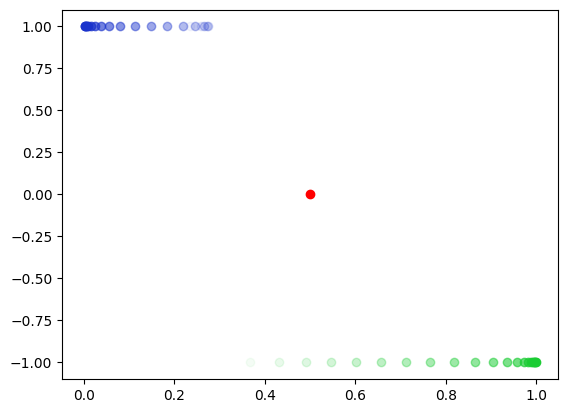

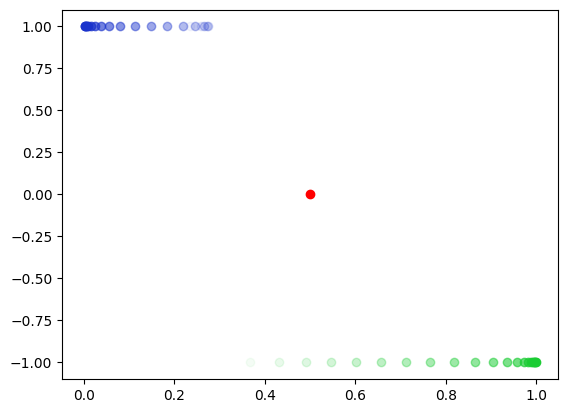

In [7]:
%matplotlib inline
trials = 20
#time = [n for n in range(trials)]
color = (0.1,0.2,0.8,0.1)
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

pl.scatter(R1[0],0, c='red')
for t in range(trials):
    b1_temp = agent1.go(b2)   
    b2_temp = agent2.go(b1)

    agent1_behaviors.append(agent1.get_output())
    agent2_behaviors.append(agent2.get_output())

    agent1_error.append(agent1.get_error())
    agent2_error.append(agent2.get_error())
    #agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    b1 = b1_temp
    b2 = b2_temp
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(b1[0],1,c=tuple(color1))
    pl.scatter(b2[0],-1,c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.5)

In [8]:
for t in range(trials):
    print(t)
    print("REFERENCE")
    print(R1)
    print("ERRORS")
    print("agent 1: ",agent1_error[t])
    print("agent 2: ",agent2_error[t])
    print("CONTROLLER OUTPUTS")
    print("agent 1: ", agent1_behaviors[t])
    print("agent 2: ",agent2_behaviors[t])
    print("\n")

0
REFERENCE
[0.5]
ERRORS
agent 1:  [0.2]
agent 2:  [0.3]
CONTROLLER OUTPUTS
agent 1:  [0.23392234]
agent 2:  [0.36649155]


1
REFERENCE
[0.5]
ERRORS
agent 1:  [0.13350845]
agent 2:  [0.26607766]
CONTROLLER OUTPUTS
agent 1:  [0.25869049]
agent 2:  [0.43015465]


2
REFERENCE
[0.5]
ERRORS
agent 1:  [0.06984535]
agent 2:  [0.24130951]
CONTROLLER OUTPUTS
agent 1:  [0.2723087]
agent 2:  [0.49002365]


3
REFERENCE
[0.5]
ERRORS
agent 1:  [0.00997635]
agent 2:  [0.2276913]
CONTROLLER OUTPUTS
agent 1:  [0.27429006]
agent 2:  [0.54680769]


4
REFERENCE
[0.5]
ERRORS
agent 1:  [-0.04680769]
agent 2:  [0.22570994]
CONTROLLER OUTPUTS
agent 1:  [0.26507183]
agent 2:  [0.60192455]


5
REFERENCE
[0.5]
ERRORS
agent 1:  [-0.10192455]
agent 2:  [0.23492817]
CONTROLLER OUTPUTS
agent 1:  [0.24569674]
agent 2:  [0.65665403]


6
REFERENCE
[0.5]
ERRORS
agent 1:  [-0.15665403]
agent 2:  [0.25430326]
CONTROLLER OUTPUTS
agent 1:  [0.21783114]
agent 2:  [0.71150855]


7
REFERENCE
[0.5]
ERRORS
agent 1:  [-0.21150855

## Chaotic Agents

In [9]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([0.2])
B2 = np.array([0.2])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([1])
A2 = np.array([1])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.5])
R2 = np.array([0.5])

# Initial behavior
behav_1 = np.array([0.8])
behav_2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    return inputs

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a behavior
def control(error, behavioral_model, previous_output):
    output = chaotic_update(previous_output, 0.1, error)
    return output


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate @ previous_state) + (behavioral_model @ previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    error = curr_system_est - inputs
    #learning_rate = 0.01
    system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate
    

In [10]:


agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, system_estimate=A1, reference=R1, init_behavior=behav_1)
agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update,  controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, system_estimate=A2, reference=R2, init_behavior=behav_2)


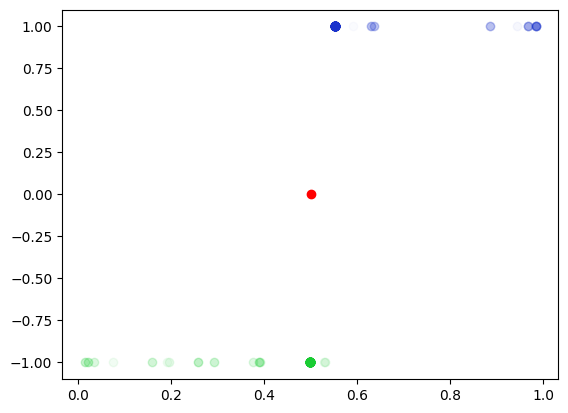

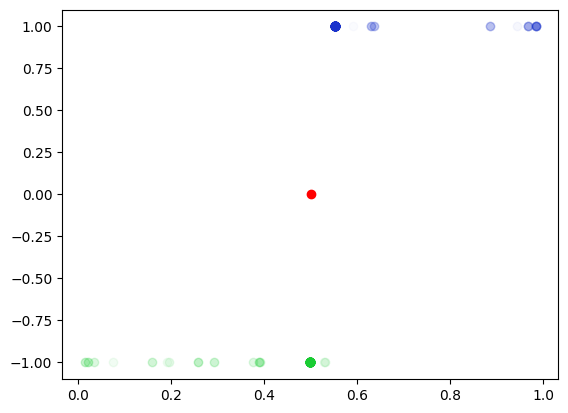

In [11]:
%matplotlib inline
trials = 50
#time = [n for n in range(trials)]
color = (0.1,0.2,0.8,0.1)
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

pl.scatter(R1[0],0, c='red')
for t in range(trials):
    b1_temp = agent1.go(b2)   
    b2_temp = agent2.go(b1)

    agent1_behaviors.append(agent1.get_output())
    agent2_behaviors.append(agent2.get_output())

    agent1_error.append(agent1.get_error())
    agent2_error.append(agent2.get_error())
    #agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    b1 = b1_temp
    b2 = b2_temp
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(b1[0],1,c=tuple(color1))
    pl.scatter(b2[0],-1,c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.5)

In [12]:
for t in range(trials):
    print(t)
    print("REFERENCE")
    print(R1)
    print("ERRORS")
    print("agent 1: ",agent1_error[t])
    print("agent 2: ",agent2_error[t])
    print("CONTROLLER OUTPUTS")
    print("agent 1: ", agent1_behaviors[t])
    print("agent 2: ",agent2_behaviors[t])
    print("\n")

0
REFERENCE
[0.5]
ERRORS
agent 1:  [0.3]
agent 2:  [-0.3]
CONTROLLER OUTPUTS
agent 1:  [0.591]
agent 2:  [0.074]


1
REFERENCE
[0.5]
ERRORS
agent 1:  [0.426]
agent 2:  [-0.091]
CONTROLLER OUTPUTS
agent 1:  [0.943]
agent 2:  [0.074]


2
REFERENCE
[0.5]
ERRORS
agent 1:  [0.426]
agent 2:  [-0.443]
CONTROLLER OUTPUTS
agent 1:  [0.966]
agent 2:  [0.192]


3
REFERENCE
[0.5]
ERRORS
agent 1:  [0.308]
agent 2:  [-0.466]
CONTROLLER OUTPUTS
agent 1:  [0.966]
agent 2:  [0.529]


4
REFERENCE
[0.5]
ERRORS
agent 1:  [-0.029]
agent 2:  [-0.466]
CONTROLLER OUTPUTS
agent 1:  [0.966]
agent 2:  [0.195]


5
REFERENCE
[0.5]
ERRORS
agent 1:  [0.305]
agent 2:  [-0.466]
CONTROLLER OUTPUTS
agent 1:  [0.966]
agent 2:  [0.531]


6
REFERENCE
[0.5]
ERRORS
agent 1:  [-0.031]
agent 2:  [-0.466]
CONTROLLER OUTPUTS
agent 1:  [0.966]
agent 2:  [0.375]


7
REFERENCE
[0.5]
ERRORS
agent 1:  [0.125]
agent 2:  [-0.466]
CONTROLLER OUTPUTS
agent 1:  [0.885]
agent 2:  [0.035]


8
REFERENCE
[0.5]
ERRORS
agent 1:  [0.465]
agent 2